In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src')
import utils

# Machine Learning Models

Many problems in machine learing seek to build a model

$$g(a; x) \approx y$$

given a data set

$$\{(a_1, y_1), \dots, (a_m, y_m)\},$$

with components
* $a_i \in \mathbf{R}^n$ - data features,
* $y_i \in \mathbf{R}$ or $\{0, 1\}$ - data value or class,
* $g: \mathbf{R}^n \to \mathbf{R}$ or $\{0, 1\}$ - prediction function,
* $x \in \mathbf{R}^n$ - model parameters,
* $m$ - number of data points, and
* $n$ - number of data features.

We can fit a model to the given data by solving an optimization problem of the form

$$\min_x \sum_{i=1}^m f_i(g(a_i; x), y_i) + r(x)$$

with components
* $x \in \mathbf{R}^n$ - model parameters,
* $f_i: \mathbf{R}^n \to \mathbf{R}$ - functions that measure how well the model fits the data for a given set of parameters, and
* $r(x): \mathbf{R}^n \to \mathbf{R}$ - regularization function.

# Logistic Regression

In the logistic regression problem, we would like to find a linear predictor

$$g(a_i; x) = x_1 a_{i1} + \dots + x_n a_{in} = a_i^Tx \approx \begin{cases} \text{positive} & \Rightarrow \quad y_i = 1, \\ \text{negative} & \Rightarrow \quad y_i = 0, \end{cases}$$

where $a_i$ are continuous data features and $y_i \in \{0, 1\}$ are discrete class labels.
One approach for deriving the [loss functions](https://en.wikipedia.org/wiki/Loss_function) $f_i$ is to combine the [Bernoulli model](https://en.wikipedia.org/wiki/Bernoulli_distribution) with a linear predictor, and then develop a [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) formulation.
Let $p_i$ be the probability that observation $i$ belongs to class 1.
We begin by writing the probability mass function for an observation $(a_i, y_i)$ given model parameters $x$ in standard form:

\begin{align}
p((a_i, y_i); x) &= p_i^{y_i} (1 - p_i)^{1 - y_i} \\
&= \exp\big( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \big) \\
&= \exp\left( y_i \log\left(\frac{p_i}{1 - p_i}\right) + \log(1 - p_i) \right)
\end{align}

Next, we assume that the term multiplied by $y_i$, the [log-odds](https://en.wikipedia.org/wiki/Logit) of observation $i$ belonging to class 1, can be approximated with our linear predictor:

$$\log\left(\frac{p_i}{1 - p_i}\right) \approx a_i^Tx$$

Substituting this into our probability above, the PMF of all $m$ i.i.d. observations is

\begin{align}
p\big(\{(a_1, y_1), \dots, (a_m, y_m)\}; x\big) &= \prod_{i=1}^m p((a_i, y_i); x) \\
&= \prod_{i=1}^m \exp\big(y_i a_i^Tx - \log\left(1 + \exp(a_i^Tx)\right) \big) \\
&= \exp\left(\sum_{i=1}^n y_i a_i^Tx - \log\left( 1 + \exp(a_i^Tx) \right) \right).
\end{align}

Alternatively, we can consider the likelihood of a set of model parameters given our $m$ observations,

$$\mathcal{L}\big(x; \{(a_1, y_1), \dots, (a_m, y_m) \} \big) = p\big(\{(a_1, y_1), \dots, (a_m, y_m)\}; x\big),$$

so that we can solve an optimization problem to find the parameters with the maximum likelihood.
In practice, this is often done by minimizing the negative log-likelihood, which results in our logistic regression problem

$$\min_x \sum_{i=1}^m \log\big( 1 + \exp(a_i^Tx) \big) - y_i a_i^T x.$$

After solving for the model parameters, we can predict the class labels of new data using the sign of the linear predictor,

$$g(a_i; x) = \begin{cases} 1 & \text{if} \quad a_i^Tx \geq 0, \\ 0 & \text{if} \quad a_i^T < 0, \end{cases}$$

or we can approximate the probability of an observation belonging to class 1,

$$P(y_i = 1 | a_i, x) = \frac{\exp(a_i^Tx)}{1 + \exp(a_i^Tx)} = \frac{1}{1 + \exp(-a_i^Tx)},$$

where the [logistic model](https://en.wikipedia.org/wiki/Logistic_function) follows from our linear approximation of the log-odds.

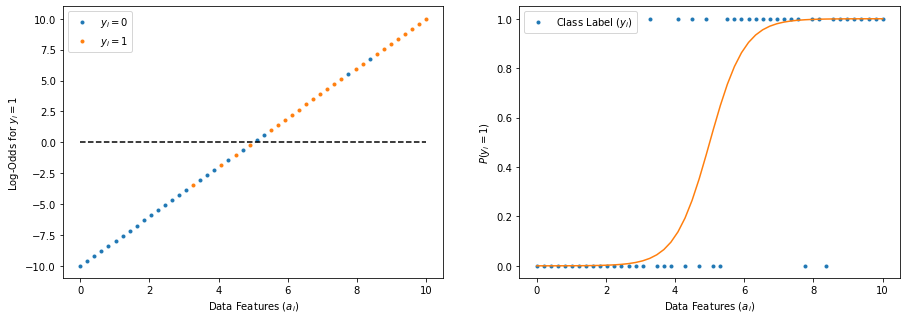

In [55]:
# Generate data
n = 50
x = np.array([-10, 2])
a = np.linspace(0, 10, n)
p = lambda a: 1/(1 + np.exp(-(x[0] + x[1]*a)))
y = np.array([0 if p(ii) + 0.5*np.random.randn() < 0.5 else 1 for ii in a])
a0 = a[y == 0]
a1 = a[y == 1]

# Plot log-odds
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(a0, x[0] + x[1]*a0, '.')
ax[0].plot(a1, x[0] + x[1]*a1, '.')
ax[0].plot([0, 10], [0, 0], 'k--')
ax[0].set_xlabel('Data Features ($a_i$)')
ax[0].set_ylabel('Log-Odds for $y_i=1$')
ax[0].legend(['$y_i = 0$', '$y_i = 1$'])

# Plot probability
ax[1].plot(a, y, '.')
ax[1].plot(a, p(a))
ax[1].set_xlabel('Data Features ($a_i$)')
ax[1].set_ylabel('$P(y_i=1)$')
ax[1].legend(['Class Label ($y_i$)'])
plt.show()